In [159]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

## Reading in Data 

In [160]:
train = pd.read_csv('~/Desktop/Redback/train_test_data/train_incl_speed.csv')
test = pd.read_csv('~/Desktop/Redback/train_test_data/test_incl_speed.csv')
remove_cols = ['Unnamed: 0'] 
train = train.drop(remove_cols, axis=1)
test = test.drop(remove_cols, axis=1)

In [161]:
train.head()

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
0,43914,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,...,0.322634,1.654680,-1.664843,-1.170158,-1.054219,1.388344,-0.019542,0.373114,-1.278439,-1.403021
1,41256,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,...,0.854476,0.118775,0.265861,-1.541565,1.354502,0.884019,1.675101,-0.908377,0.292293,0.854514
2,40647,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,...,-0.286708,-1.196300,1.468756,-1.107191,-1.273721,1.703593,1.290507,0.883771,1.840896,1.053696
3,39945,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,...,-0.607310,-1.353579,-0.435863,1.464349,1.375929,-1.157524,0.205979,-0.686924,1.726430,1.010909
4,40476,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,...,1.374368,0.426107,1.099293,1.109631,1.476217,0.307232,0.905936,1.401298,-0.505198,0.438215


In [162]:
test.head()

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
0,41301,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.307481
1,41202,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.312627
2,41136,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.303285
3,42048,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088,-0.033375
4,41922,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088,0.000796


In [163]:
y_train = train.iloc[:, train.columns == "LapTime_max"]
X_train = train.iloc[:, train.columns != "LapTime_max"]
y_test = test.iloc[:, test.columns == "LapTime_max"]
X_test = test.iloc[:, test.columns != "LapTime_max"]

## LASSO 

In [164]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train, np.ravel(y_train)) # the np.ravel is a necessary detail for compatibility 
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 14.293790480830994


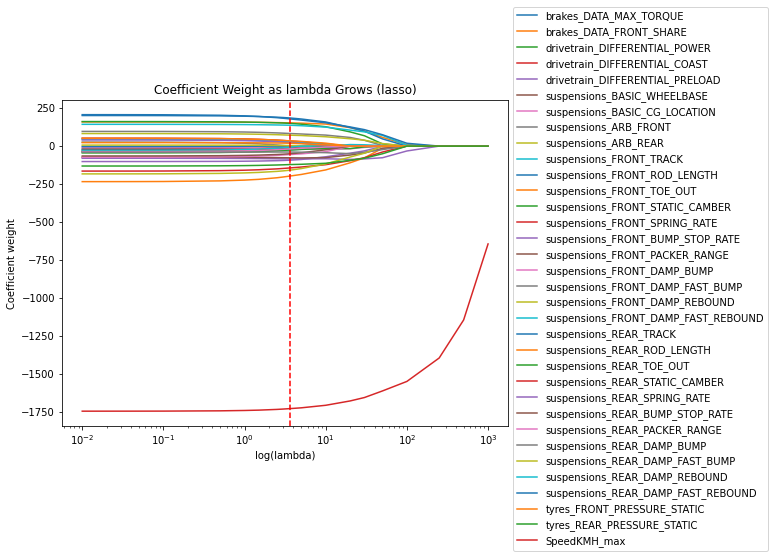

In [165]:
col_list = X_train.columns

y_train_arr = np.array(y_train)
X_train_arr = np.array(X_train)

lambdas = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 3, 3.66, 5, 10, 20, 30, 50, 100, 250, 500, 1000]
lasso_coefs = []
for l in lambdas:
    lasso = Lasso(alpha = l, fit_intercept = True)
    lasso.fit(X_train_arr, y_train_arr)
    lasso_coefs.append(lasso.coef_)

# make sure that the coefs(weights) is an array
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize = (8, 6))
for col in range(lasso_coefs.shape[1]):
    plt.plot(lambdas, lasso_coefs[:,col], label = col_list[col])

# scale x axis to log of lambda 
plt.xscale('log') 

# legend, title, axes labels 
plt.legend(bbox_to_anchor = (1, 1.3))
plt.title('Coefficient Weight as lambda Grows (lasso)')
plt.ylabel('Coefficient weight')
plt.xlabel('log(lambda)')
plt.axvline(3.6653263589356353, color = "red", linestyle = '--')
plt.show()

In [166]:
pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train.columns)

,0
brakes_DATA_MAX_TORQUE,-0.000
brakes_DATA_FRONT_SHARE,137.457
drivetrain_DIFFERENTIAL_POWER,111.197
drivetrain_DIFFERENTIAL_COAST,3.442
drivetrain_DIFFERENTIAL_PRELOAD,-82.929
suspensions_BASIC_WHEELBASE,0.000
suspensions_BASIC_CG_LOCATION,-19.374
suspensions_ARB_FRONT,66.184
suspensions_ARB_REAR,54.669
suspensions_FRONT_TRACK,5.570


According to LASSO, we have a few insignificant variables in predicting laptime
- brakes_DATA_MAX_TORQUE	
- suspensions_BASIC_WHEELBASE
- suspensions_FRONT_ROD_LENGTH
- suspensions_FRONT_SPRING_RATE
- suspensions_FRONT_DAMP_FAST_BUMP
- suspensions_FRONT_DAMP_REBOUND
- suspensions_REAR_TOE_OUT
- suspensions_REAR_SPRING_RATE
- suspensions_REAR_PACKER_RANGE

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(10, shuffle = True, random_state = 1) 

score_lasso = cross_val_score(lasso_optimal, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')

In [168]:
print("RMSE of LASSO Regression =", np.sqrt(-1*np.mean(score_lasso)))

RMSE of LASSO Regression = 1285.400888737929


In [169]:
X_test

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
0,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.307481
1,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.312627
2,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990,0.303285
3,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088,-0.033375
4,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088,0.000796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029,-0.192657
393,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029,-0.263067
394,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029,-0.250439
395,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029,-0.179659


## Ridge 

In [170]:
X_train = X_train.iloc[:,lasso_optimal.coef_ != 0]
X_test = X_test.iloc[:,lasso_optimal.coef_ != 0]

In [171]:
#X_train = X_train.iloc[:, X_train.columns != "suspensions_REAR_ROD_LENGTH"]
#X_test = X_test.iloc[:, X_test.columns != "suspensions_REAR_ROD_LENGTH"]

In [172]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [173]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 21.03299056619255


In [174]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=21.03299056619255)

In [175]:
kf=KFold(10, shuffle=True, random_state=1) 
score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 1224.6076324819335


In [176]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred)*100)

73.52925236048522


## Max Lap Time Predictions

### Seeing what the max laptime would be for optimal parameters (using our predicted Max Speed)

In [178]:
best_input = pd.read_csv("/Users/lexy/Desktop/Redback/best_average_input_params.csv")

In [179]:
best_input = best_input.T

In [180]:
header_row = 0

best_input.columns = best_input.iloc[header_row]

In [181]:
X_train_predictors_without_speed = X_train.iloc[:,X_train.columns != "SpeedKMH_max"]

In [182]:
X_train_predictors_without_speed

,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,suspensions_FRONT_TOE_OUT,suspensions_FRONT_STATIC_CAMBER,...,suspensions_REAR_TRACK,suspensions_REAR_ROD_LENGTH,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,-0.496028,0.749747,-0.574274,0.945005,-0.995821,-1.910269,-1.457874,-0.985739,-0.169527,1.515841,...,0.197253,1.491719,0.948846,1.654680,-1.170158,-1.054219,1.388344,-0.019542,0.373114,-1.278439
1,1.564940,-0.589535,0.314667,-0.189615,0.317802,0.931124,1.298159,-0.560395,-0.082670,1.705696,...,0.194527,-0.544719,-1.278742,0.118775,-1.541565,1.354502,0.884019,1.675101,-0.908377,0.292293
2,0.863518,-0.374172,1.551179,-0.634678,-1.213966,-0.403501,0.423389,-0.418503,-0.704035,1.301881,...,-1.411645,0.403622,0.488404,-1.196300,-1.107191,-1.273721,1.703593,1.290507,0.883771,1.840896
3,0.096889,-0.169427,-1.246456,1.638991,1.382735,-0.645199,0.370391,0.682063,-1.098234,-0.157672,...,0.312633,-1.181105,-1.515706,-1.353579,1.464349,1.375929,-1.157524,0.205979,-0.686924,1.726430
4,1.317361,1.204248,1.282240,1.104064,-0.402191,0.170541,0.035663,-0.634390,0.044276,0.393729,...,-1.613877,-0.683226,0.456738,0.426107,1.109631,1.476217,0.307232,0.905936,1.401298,-0.505198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-0.787218,0.917728,0.787556,-1.069729,1.446852,-1.307422,-0.208520,-1.126964,-0.336561,1.508843,...,-1.621082,-1.354552,0.868151,1.419798,-1.378914,0.345468,0.148040,1.631341,-1.102068,1.026490
923,-0.186163,-1.186386,0.152926,0.913135,-0.814562,-1.027952,1.394277,1.307760,1.173422,-1.176077,...,1.022733,-0.975216,-1.397478,-0.022052,-0.158866,-1.354222,0.624633,0.749008,-0.908747,0.415245
924,0.694292,-0.802115,-0.297512,-0.140659,-0.215168,-0.543295,1.241881,1.194680,1.420632,1.882469,...,0.438042,-0.034361,-1.023917,0.458616,-0.395471,-1.445544,-1.287025,0.191599,-1.256889,1.764098
925,-1.777535,-0.953535,0.946532,1.265623,-0.800586,0.443622,-0.393545,0.742778,1.313731,-1.220542,...,-0.068755,0.049242,0.984387,0.457529,0.350781,1.165338,0.589153,-1.677578,1.209412,-1.430639


In [183]:
best_input = best_input[X_train_predictors_without_speed.columns]

In [184]:
best_input["SpeedKMH_max"] = 88.48194614826454

In [185]:
best_input

Unnamed: 0,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,suspensions_FRONT_TOE_OUT,suspensions_FRONT_STATIC_CAMBER,...,suspensions_REAR_ROD_LENGTH,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
Unnamed: 0,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,suspensions_FRONT_TOE_OUT,suspensions_FRONT_STATIC_CAMBER,...,suspensions_REAR_ROD_LENGTH,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,88.481946
0,0.678011,0.407469,0.466063,12.069867,0.472305,81733.745744,81671.102979,1.207917,0.000974,-1.56867,...,0.014862,-1.1081,119551.141066,2629.327617,2041.47872,2932.474982,2157.745235,12.585759,13.630724,88.481946


In [186]:
dictionaryObject = best_input.to_dict()

print("DataFrame as a dictionary:")
print(dictionaryObject)

DataFrame as a dictionary:
{'brakes_DATA_FRONT_SHARE': {'Unnamed: 0': 'brakes_DATA_FRONT_SHARE', '0': 0.6780105288932419}, 'drivetrain_DIFFERENTIAL_POWER': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_POWER', '0': 0.4074694417238002}, 'drivetrain_DIFFERENTIAL_COAST': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_COAST', '0': 0.4660628011753183}, 'drivetrain_DIFFERENTIAL_PRELOAD': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_PRELOAD', '0': 12.069866973555335}, 'suspensions_BASIC_CG_LOCATION': {'Unnamed: 0': 'suspensions_BASIC_CG_LOCATION', '0': 0.4723054358472086}, 'suspensions_ARB_FRONT': {'Unnamed: 0': 'suspensions_ARB_FRONT', '0': 81733.74574372184}, 'suspensions_ARB_REAR': {'Unnamed: 0': 'suspensions_ARB_REAR', '0': 81671.1029793046}, 'suspensions_FRONT_TRACK': {'Unnamed: 0': 'suspensions_FRONT_TRACK', '0': 1.207917277179236}, 'suspensions_FRONT_TOE_OUT': {'Unnamed: 0': 'suspensions_FRONT_TOE_OUT', '0': 0.0009742115572967}, 'suspensions_FRONT_STATIC_CAMBER': {'Unnamed: 0': 'suspensions_FRONT_STATIC

In [187]:
best_input = best_input.iloc[1,:]

In [188]:
best_input

Unnamed: 0
brakes_DATA_FRONT_SHARE                     0.678011
drivetrain_DIFFERENTIAL_POWER               0.407469
drivetrain_DIFFERENTIAL_COAST               0.466063
drivetrain_DIFFERENTIAL_PRELOAD            12.069867
suspensions_BASIC_CG_LOCATION               0.472305
suspensions_ARB_FRONT                   81733.745744
suspensions_ARB_REAR                    81671.102979
suspensions_FRONT_TRACK                     1.207917
suspensions_FRONT_TOE_OUT                   0.000974
suspensions_FRONT_STATIC_CAMBER             -1.56867
suspensions_FRONT_BUMP_STOP_RATE       127376.142216
suspensions_FRONT_PACKER_RANGE              0.079617
suspensions_FRONT_DAMP_BUMP              2402.577444
suspensions_FRONT_DAMP_FAST_REBOUND      1894.169224
suspensions_REAR_TRACK                      1.202902
suspensions_REAR_ROD_LENGTH                 0.014862
suspensions_REAR_STATIC_CAMBER               -1.1081
suspensions_REAR_BUMP_STOP_RATE        119551.141066
suspensions_REAR_DAMP_BUMP         

In [189]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis = 1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

predictors = X_train.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

best_input = (best_input - mu)/sigma

In [190]:
y_hat = ridge.predict(pd.DataFrame([best_input]))

In [191]:
y_hat[0]

41469.45479264526

Therefore it would take 41.5 seconds to complete the lap with these best params which makes sensee!!!!! :))))))



### Seeing what Max Lap Time would be for case 2 (80_85)

In [192]:
case2_input = pd.read_csv("/Users/lexy/Desktop/Redback/case2_average_input_params.csv")
case2_input = case2_input.T

header_row = 0

case2_input.columns = case2_input.iloc[header_row]

X_train_predictors_without_speed = X_train.iloc[:,X_train.columns != "SpeedKMH_max"]

case2_input = case2_input[X_train_predictors_without_speed.columns]

case2_input["SpeedKMH_max"] = 88.48194614826454

dictionaryObject = case2_input.to_dict()

case2_input = case2_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis = 1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

predictors = X_train.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

case2_input = (case2_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case2_input]))

print("predicted Max LapTime is ",y_hat[0])

predicted Max LapTime is  41290.928051578514


### Seeing what Max Lap Time would be for case 3 (75_80)

In [193]:
case3_input = pd.read_csv("/Users/lexy/Desktop/Redback/case3_average_input_params.csv")
case3_input = case3_input.T

header_row = 0

case3_input.columns = case3_input.iloc[header_row]

X_train_predictors_without_speed = X_train.iloc[:,X_train.columns != "SpeedKMH_max"]

case3_input = case3_input[X_train_predictors_without_speed.columns]

case3_input["SpeedKMH_max"] = 88.48194614826454

dictionaryObject = case3_input.to_dict()

case3_input = case3_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis = 1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

predictors = X_train.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

case3_input = (case3_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case3_input]))

print("predicted Max LapTime is ",y_hat[0])

predicted Max LapTime is  41253.3522518635


### Seeing what Max Lap Time would be for case 4 (70_75)

In [194]:
case4_input = pd.read_csv("/Users/lexy/Desktop/Redback/case4_average_input_params.csv")
case4_input = case4_input.T

header_row = 0

case4_input.columns = case4_input.iloc[header_row]

X_train_predictors_without_speed = X_train.iloc[:,X_train.columns != "SpeedKMH_max"]

case4_input = case4_input[X_train_predictors_without_speed.columns]

case4_input["SpeedKMH_max"] = 88.48194614826454

dictionaryObject = case4_input.to_dict()

case4_input = case4_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis = 1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

predictors = X_train.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

case4_input = (case4_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case4_input]))

print("predicted Max LapTime is ",y_hat[0])

predicted Max LapTime is  41418.22099042189


### Seeing what Max Lap Time would be for worst case

In [195]:
worst_input = pd.read_csv("/Users/lexy/Desktop/Redback/worst_average_input_params.csv")
worst_input = worst_input.T

header_row = 0

worst_input.columns = worst_input.iloc[header_row]

X_train_predictors_without_speed = X_train.iloc[:,X_train.columns != "SpeedKMH_max"]

worst_input = worst_input[X_train_predictors_without_speed.columns]

worst_input["SpeedKMH_max"] = 88.48194614826454

dictionaryObject = worst_input.to_dict()

worst_input = worst_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis = 1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

predictors = X_train.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

worst_input = (worst_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([worst_input]))

print("predicted Max LapTime is ",y_hat[0])

predicted Max LapTime is  42854.148224860866


## Model Performance comparison 

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross validator
kf=KFold(10, shuffle = True, random_state = 1) 

# Methods
columns = ['CV RMSE']
rows = ['Ridge','Lasso']

regressions = [ridge, lasso_optimal]
results = pd.DataFrame(0.0, columns = columns, index = rows) # initialising a dataframe to hold the results

methods = {k: v for k, v in zip(rows, regressions)}

keys = ['Ridge','Lasso']
for key in keys:
    scores = cross_val_score(methods[key], X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
    print('scores for', key, ' : ', scores) 
    results.loc[key] = np.sqrt(-1*np.mean(scores)) 
    
results.round(3)

scores for Ridge  :  [ -318747.49660511  -548956.50696947  -398321.30135678  -484147.55239011
 -5445408.42362945  -658343.49872381  -344264.14271201  -803089.45168928
 -4562103.77857293 -1433256.3826811 ]
scores for Lasso  :  [ -303710.97607046  -370390.1016825   -325777.40535225  -388664.04308756
 -5730212.33226035  -511654.08174365  -339981.10822783 -1003587.69323038
 -5060361.88575268 -2416533.02093041]


,CV RMSE
Ridge,1224.608
Lasso,1282.610


Using LASSO to select best features and then running ridge on selected features resulted in lower RMSE. 

I think if we had some interaction terms we would be able to improve model performance. Let's try by adding some in

## Feature Engineering 

### Data Processing again

In [145]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

input_params = df_recent.iloc[:, -33:]
Speed = df_recent.iloc[:, df_recent.columns == "SpeedKMH_max"]
input_params["SpeedKMH_max"] = Speed
predictors = input_params.columns

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

y_train = train.iloc[:, train.columns == "LapTime_max"]
X_train = train[predictors]
y_test = test.iloc[:, test.columns == "LapTime_max"]
X_test = test[predictors]

In [146]:
# polynomial features degree 2
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

X_train_poly = poly.fit_transform(X_train)
poly_col_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, columns = poly_col_names) 
inplace = True
X_train_poly.columns = X_train_poly.columns.str.replace(',','_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

# test set
X_test_poly = poly.fit_transform(X_test)
poly_col_names = poly.get_feature_names(input_features = X_test.columns)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = poly_col_names) 

X_test_poly.columns = X_test_poly.columns.str.replace(',','_')
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')

<ipython-input-146-7e5405319c0f>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')
<ipython-input-146-7e5405319c0f>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')


In [147]:
# scaling
mu = X_train_poly.mean() # mean for each feature
sigma = X_train_poly.std() # std for each feature

X_train_poly_scaled = (X_train_poly - mu)/sigma
X_test_poly_scaled = (X_test_poly - mu)/sigma

### Lasso (with poly)

In [148]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train_poly_scaled, np.ravel(y_train)) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785622.1618388891, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314954.78588199615, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398831.44402098656, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinat

LassoCV(cv=5)

In [149]:
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 1.6434385596084997


In [150]:
lasso_features = pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train_poly_scaled.columns)

In [151]:
X_train_poly_scaled

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_DAMP_FAST_REBOUND_2,suspensions_REAR_DAMP_FAST_REBOUND tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND SpeedKMH_max,tyres_FRONT_PRESSURE_STATIC_2,tyres_FRONT_PRESSURE_STATIC tyres_REAR_PRESSURE_STATIC,tyres_FRONT_PRESSURE_STATIC SpeedKMH_max,tyres_REAR_PRESSURE_STATIC_2,tyres_REAR_PRESSURE_STATIC SpeedKMH_max,SpeedKMH_max_2
0,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,-0.985739,...,-0.219714,0.198825,-0.696292,-0.222802,0.241276,-0.680571,0.075652,-1.230444,-1.411084,-1.431598
1,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,-0.560395,...,2.044275,0.437350,1.545123,1.786261,-0.917350,-0.519448,-0.777119,0.174259,0.455374,0.881470
2,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,-0.418503,...,1.429509,1.846266,2.457145,1.441204,0.836181,2.369946,1.130977,2.232395,2.062514,1.100075
3,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,0.682063,...,0.015184,-0.289537,1.129655,0.333544,-0.751298,0.476013,-0.523537,2.057389,1.934298,1.052916
4,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,-0.634390,...,0.874053,1.877174,0.328641,0.935966,1.516541,0.618773,1.508107,-0.624875,-0.413666,0.432180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.253020,-0.787218,0.917728,0.787556,-1.069729,1.388933,1.446852,-1.307422,-0.208520,-1.126964,...,1.971337,0.218583,2.146292,1.729852,-1.050882,-0.331576,-0.985230,1.066696,1.174742,0.821436
923,1.592009,-0.186163,-1.186386,0.152926,0.913135,-1.241835,-0.814562,-1.027952,1.394277,1.307760,...,0.664421,-0.112236,0.852436,0.809458,-0.917616,-0.456080,-0.813843,0.313237,0.519789,0.598349
924,0.102421,0.694292,-0.802115,-0.297512,-0.140659,0.586363,-0.215168,-0.543295,1.241881,1.194680,...,-0.000402,-0.668758,1.134600,0.087425,-1.149762,-0.157337,-1.307916,2.114576,1.505649,-0.603708
925,1.094944,-1.777535,-0.953535,0.946532,1.265623,0.679602,-0.800586,0.443622,-0.393545,0.742778,...,-1.320899,-1.129208,-1.566462,-1.735835,1.255186,-0.401320,0.540736,-1.330010,-1.685851,-2.489943


In [152]:
X_train_poly_selected_features = X_train_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]
X_test_poly_selected_features = X_test_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]

In [153]:
X_train_poly_selected_features

,brakes_DATA_MAX_TORQUE,SpeedKMH_max,brakes_DATA_MAX_TORQUE_2,brakes_DATA_MAX_TORQUE drivetrain_DIFFERENTIAL_COAST,brakes_DATA_MAX_TORQUE suspensions_BASIC_WHEELBASE,brakes_DATA_MAX_TORQUE suspensions_ARB_FRONT,brakes_DATA_MAX_TORQUE suspensions_FRONT_DAMP_FAST_BUMP,brakes_DATA_MAX_TORQUE SpeedKMH_max,brakes_DATA_FRONT_SHARE suspensions_BASIC_WHEELBASE,brakes_DATA_FRONT_SHARE suspensions_FRONT_TRACK,...,suspensions_REAR_STATIC_CAMBER suspensions_REAR_DAMP_REBOUND,suspensions_REAR_STATIC_CAMBER suspensions_REAR_DAMP_FAST_REBOUND,suspensions_REAR_PACKER_RANGE suspensions_REAR_DAMP_REBOUND,suspensions_REAR_PACKER_RANGE tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_BUMP suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_BUMP SpeedKMH_max,suspensions_REAR_DAMP_FAST_BUMP suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_BUMP tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_REBOUND tyres_REAR_PRESSURE_STATIC,SpeedKMH_max_2
0,1.513706,-1.403021,1.626809,-0.254166,1.479497,-1.826571,0.434897,0.928326,-0.283699,-1.003522,...,0.841984,0.831996,-0.573771,-1.050191,-1.112127,-1.270679,-0.506520,-1.205632,-0.174109,-1.431598
1,0.440057,0.854514,0.364386,0.421964,0.908899,1.198096,-0.717437,0.703271,2.335643,0.986793,...,-1.895275,-2.363833,0.787025,-0.525294,-0.448704,-1.450310,2.002372,1.400495,0.971928,0.881470
2,1.250806,1.053696,1.298093,2.096189,0.633078,0.007365,-0.813793,1.596257,0.250982,0.493688,...,0.150665,0.191914,2.526935,2.165862,-1.189375,-0.985518,-0.709575,-0.740744,3.320843,1.100075
3,-1.830338,1.010909,-1.607348,-1.304049,-1.657103,-1.065425,-0.176451,-1.561943,-0.000885,0.535562,...,-0.640573,-1.421135,-0.979125,-0.758788,2.236305,1.674951,0.185631,2.571628,-0.095473,1.052916
4,-1.616643,0.438215,-1.462161,0.340982,-1.660634,-0.443753,-1.429737,-1.463758,0.686503,0.722421,...,0.354894,0.230706,0.944094,2.353949,2.020395,1.183245,1.601023,0.854432,-0.132577,0.432180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.253020,0.799436,-1.195816,0.176022,-0.780514,-1.424662,0.211399,-1.021581,-0.203857,-1.317360,...,0.803568,0.652884,0.670220,-0.369677,-0.666167,-1.287488,0.428561,0.880337,0.890698,0.821436
923,1.592009,0.593297,1.727170,0.624267,0.881103,-0.692726,0.156132,1.767537,-0.690299,0.647025,...,-1.854471,-1.763334,1.308394,-0.001296,-1.045019,-0.067862,-1.020966,-1.086388,0.855432,0.598349
924,0.102421,-0.560473,0.011184,-0.266045,0.257648,-0.474581,-1.103773,-0.067864,0.936607,1.459708,...,-0.247220,-0.963252,-1.169435,-1.298419,-1.145458,-0.460642,-1.434313,-0.972924,-0.228215,-0.603708
925,1.094944,-2.548931,1.109212,1.343186,1.190784,0.971111,0.766794,0.146298,-1.448528,-1.227654,...,0.911204,0.909189,0.438102,1.106390,1.074969,-0.099784,1.545061,-0.073660,-0.711500,-2.489943


Therefore, LASSO has reduced our feature subset from 629 to 125. Now we do ridge on these selected features

### Ridge (with poly selected)

In [154]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train_poly_selected_features, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [155]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 0.00956831081750475


In [156]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=0.00956831081750475)

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(10, shuffle=True, random_state=1) 

score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 2104.750371519169


In [157]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(10, shuffle=True, random_state=1) 

score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 1229.7964266967838


In [158]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred)*100)

73.72156239598522


It looks like it's actually performing worse than our initial ridge but better than our initial lasso. I'm thinking of trying to predict max speed instead now instead of max laptime. Maybe the input parameters are more related to the max speed than it is to the lap time. I know for sure that max speed determines lap time so if we can predict max speed then we can also predict lap time roughly using the prediction of max speed. 